In [ ]:
#Installing necessary packages
!pip install -q gdown tensorflow opencv-python matplotlib


In [ ]:
import requests

url = 'https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/fer2013_mini_XCEPTION.119-0.65.hdf5'
model_path = 'fer2013_mini_XCEPTION.hdf5'


In [ ]:

r = requests.get(url)
if r.status_code == 200:
    open(model_path, 'wb').write(r.content)
    print("Model downloaded successfully.")
else:
    print("Error downloading model:", r.status_code)


Model downloaded successfully.


In [ ]:
#loading the model
from tensorflow.keras.models import load_model, Model
model = load_model(model_path,compile = False)
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_1             │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 46, 46, 5) │         45 │ input_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 46, 46, 5) │         20 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 46, 46, 5) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 44, 44, 8) │        360 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 44, 44, 8) │         32 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 44, 44, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 44, 44,    │        200 │ activation_2[0][… │
│ (SeparableConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 44, 44,    │         64 │ separable_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 44, 44,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 44, 44,    │        400 │ activation_3[0][… │
│ (SeparableConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 44, 44,    │         64 │ separable_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 22, 22,    │        128 │ activation_2[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 22, 22,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 22, 22,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 22, 22,    │          0 │ max_pooling2d_1[… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 22, 22,    │        656 │ add_1[0][0]       │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 58,168 (227.22 KB)

 Trainable params: 56,702 (221.49 KB)

 Non-trainable params: 1,466 (5.73 KB)

In [ ]:
#Load and preprocess a sample face
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


In [ ]:
img_url = 'https://raw.githubusercontent.com/oarriaga/face_classification/master/images/test_image.jpg'
img_path = 'test_face.jpg'

In [ ]:
!wget -q {img_url} -O {img_path}

In [ ]:
# Load image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Checking and preprocessing
if img is None:
    raise Exception("Image loading failed.")
else:
    print("Image loaded:", img.shape)
    img = cv2.resize(img, (48, 48))  # Resize to model input
    input_img = img_to_array(img)
    input_img = np.expand_dims(input_img, axis=0) / 255.0
    input_img = input_img.reshape((1, 48, 48, 1))


Image loaded: (1536, 2048)


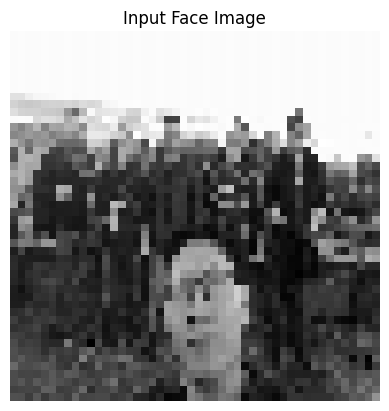

In [ ]:
plt.imshow(img, cmap='gray')
plt.title("Input Face Image")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:

# Convolutional layer outputs
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]


In [ ]:

#Build activation model
activation_model = Model(inputs=model.input, outputs=layer_outputs)


In [ ]:

# Get activations
activations = activation_model.predict(input_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


In [ ]:

# Visualizing activations from the first conv layer
first_layer_activation = activations[0]  # First conv layer's output
num_filters = first_layer_activation.shape[-1]

In [ ]:

import matplotlib.pyplot as plt


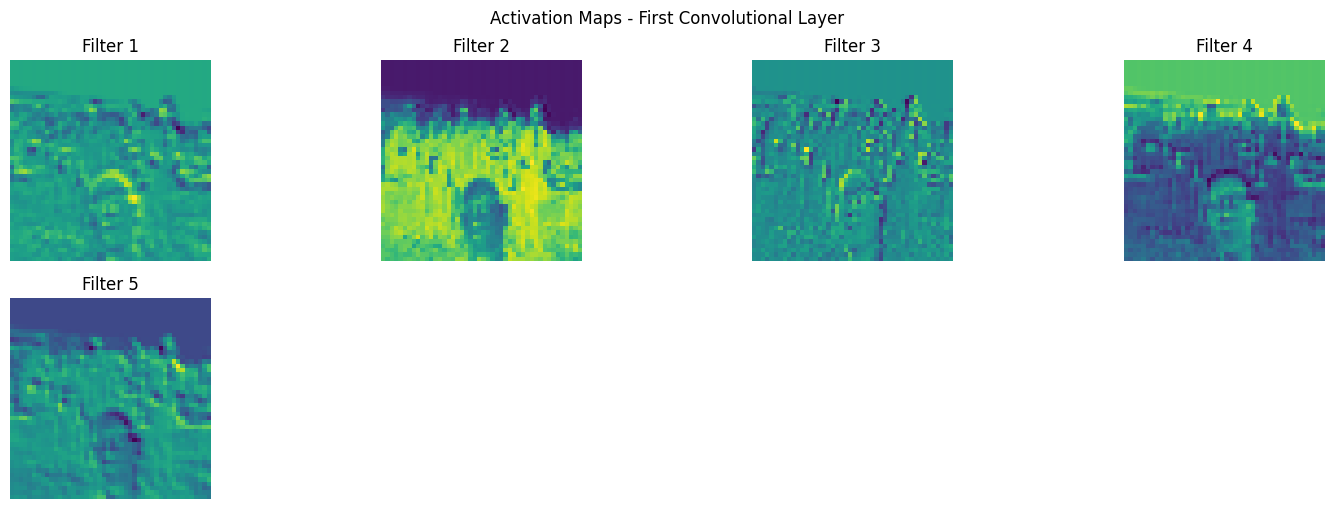

In [ ]:

plt.figure(figsize=(15, 10))
for i in range(min(num_filters, 16)):  # Show only first 16 filters
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.suptitle("Activation Maps - First Convolutional Layer")
plt.tight_layout()
plt.show()